In [6]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL','AMZN','GOOGL','MSFT','FB','INTC','CSCO','CMCSA','NVDA','NFLX','ADBE','AMGN','TXN','AVGO','PYPL','GILD','COST','QCOM']       
 
prices=list()
sentiment=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    sentimentVector =  pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalSentiment/'+file+'.csv')
    price= pd.read_csv('/home/andrea/Desktop/NLFF/TechnicalDataset/indexes'+file+'.csv')
    #alignment of data
    maxdata=max(sentimentVector['initTime'])
    mindata=min(sentimentVector['initTime'])
    price=price[price['Unnamed: 0']>=mindata]
    price=price[price['Unnamed: 0']<=maxdata]
    sentimentVector=sentimentVector.drop(['Unnamed: 0', 'initTime' ], axis=1)
    price=price.drop(['Unnamed: 0'],axis=1)
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #
    
    
    sentiment.append(sentimentVector)
    prices.append(price)
    

In [7]:
from imblearn.over_sampling import SMOTE, ADASYN
def smote(x,y):
    X_resampled, y_resampled = SMOTE().fit_sample(x, y)
    #print('check',sum(y_resampled)/len(y_resampled))
    return X_resampled,y_resampled
def adasyn(x,y):
    X_resampled, y_resampled = ADASYN().fit_sample(x, y)
   
    return X_resampled,y_resampled
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u
                   

Working on... AAPL
1.637893706954064
Window: 0
[[168 115]
 [172 111]]
F1,score 0.4361493123772102
Accuracy: 0.4929328621908127
1.0
Window: 4
[[258  19]
 [250  38]]
F1,score 0.2202898550724638
Accuracy: 0.5238938053097345
0.0001
Window: 5
[[217  65]
 [192  91]]
F1,score 0.4145785876993167
Accuracy: 0.5451327433628319
0.046415888336127774
Window: 25
[[230  60]
 [168 103]]
F1,score 0.47465437788018433
Accuracy: 0.5935828877005348
0.3593813663804626
Window: 26
[[242  44]
 [193  82]]
F1,score 0.40897755610972564
Accuracy: 0.5775401069518716
51.7947467923121
Window: 50
[[306  32]
 [188  30]]
F1,score 0.21428571428571427
Accuracy: 0.60431654676259
[0, 0, 0, 0, 0, 0]
[0.4929328621908127, 0.5238938053097345, 0.5451327433628319, 0.5935828877005348, 0.5775401069518716, 0.60431654676259]
accuracy
accuracy


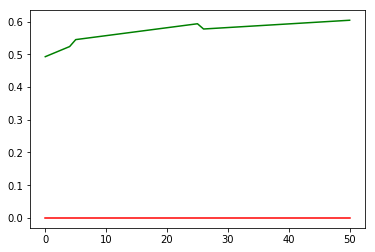

Working on... AMZN
610.5402296585327
Window: 0
[[156 111]
 [158 114]]
F1,score 0.4587525150905433
Accuracy: 0.5009276437847866
10000.0
Window: 4
[[ 85 155]
 [128 170]]
F1,score 0.5457463884430176
Accuracy: 0.4739776951672863
10000.0
Window: 5
[[ 66 173]
 [ 98 201]]
F1,score 0.5973254086181279
Accuracy: 0.4962825278810409
10000.0
Window: 25
[[ 45 145]
 [ 87 257]]
F1,score 0.6890080428954424
Accuracy: 0.5655430711610487
10000.0
Window: 26
[[ 43 151]
 [ 93 247]]
F1,score 0.6693766937669376
Accuracy: 0.5430711610486891
10000.0
Window: 50
[[ 70 100]
 [117 242]]
F1,score 0.6904422253922967
Accuracy: 0.5897920604914934
[0, 0, 0, 0, 0, 0]
[0.5009276437847866, 0.4739776951672863, 0.4962825278810409, 0.5655430711610487, 0.5430711610486891, 0.5897920604914934]
accuracy
accuracy


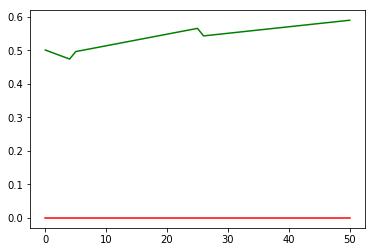

Working on... GOOGL
227.58459260747887
Window: 0
[[178 218]
 [176 226]]
F1,score 0.5342789598108746
Accuracy: 0.506265664160401
0.005994842503189409
Window: 4
[[250 133]
 [289 125]]
F1,score 0.37202380952380953
Accuracy: 0.47051442910915936
21.54434690031882
Window: 5
[[ 62 315]
 [ 73 347]]
F1,score 0.6414048059149723
Accuracy: 0.5131744040150564
31.622776601683793
Window: 25
[[ 44 329]
 [ 68 352]]
F1,score 0.6394187102633969
Accuracy: 0.49936948297604034
4.39397056076079
Window: 26
[[ 79 301]
 [134 279]]
F1,score 0.5619335347432024
Accuracy: 0.4514501891551072
166.81005372000558
Window: 50
[[ 44 308]
 [ 38 398]]
F1,score 0.6970227670753064
Accuracy: 0.5609137055837563
[0, 0, 0, 0, 0, 0]
[0.506265664160401, 0.47051442910915936, 0.5131744040150564, 0.49936948297604034, 0.4514501891551072, 0.5609137055837563]
accuracy
accuracy


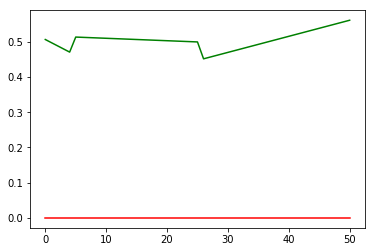

Working on... MSFT
10000.0
Window: 0
[[325 118]
 [317 149]]
F1,score 0.40654843110504774
Accuracy: 0.5214521452145214
84.83428982440716
Window: 4
[[327  76]
 [397 108]]
F1,score 0.3134978229317852
Accuracy: 0.4790748898678414
84.83428982440716
Window: 5
[[330  73]
 [407  98]]
F1,score 0.28994082840236685
Accuracy: 0.4713656387665198
10000.0
Window: 25
[[ 66 298]
 [139 401]]
F1,score 0.6472962066182405
Accuracy: 0.5165929203539823
610.5402296585327
Window: 26
[[212 145]
 [318 229]]
F1,score 0.49728555917481
Accuracy: 0.48783185840707965
10000.0
Window: 50
[[138 199]
 [275 287]]
F1,score 0.5477099236641221
Accuracy: 0.4727474972191324
[0, 0, 0, 0, 0, 0]
[0.5214521452145214, 0.4790748898678414, 0.4713656387665198, 0.5165929203539823, 0.48783185840707965, 0.4727474972191324]
accuracy
accuracy


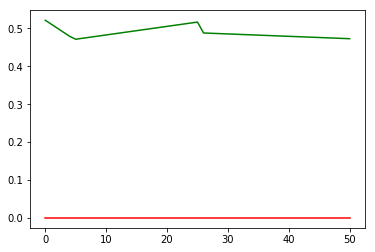

Working on... FB
0.005994842503189409
Window: 0
[[277 161]
 [290 178]]
F1,score 0.4411400247831474
Accuracy: 0.5022075055187638
19.306977288832496
Window: 4
[[275 163]
 [258 209]]
F1,score 0.49821215733015484
Accuracy: 0.5348066298342542
166.81005372000558
Window: 5
[[219 222]
 [221 243]]
F1,score 0.5231431646932185
Accuracy: 0.5104972375690607
227.58459260747887
Window: 25
[[234 196]
 [236 235]]
F1,score 0.5210643015521065
Accuracy: 0.5205327413984462
10000.0
Window: 26
[[212 217]
 [239 233]]
F1,score 0.5054229934924078
Accuracy: 0.4938956714761376
10000.0
Window: 50
[[160 227]
 [232 277]]
F1,score 0.5468904244817375
Accuracy: 0.4877232142857143
[0, 0, 0, 0, 0, 0]
[0.5022075055187638, 0.5348066298342542, 0.5104972375690607, 0.5205327413984462, 0.4938956714761376, 0.4877232142857143]
accuracy
accuracy


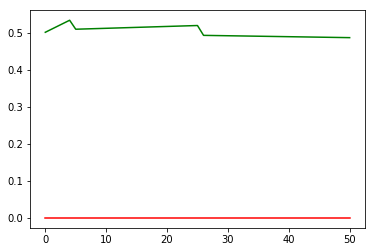

Working on... INTC


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


372.7593720314938
Window: 0
[[265 177]
 [246 221]]
F1,score 0.5109826589595377
Accuracy: 0.5346534653465347
10000.0
Window: 4
[[265 164]
 [283 196]]
F1,score 0.46722288438617404
Accuracy: 0.5077092511013216
10000.0
Window: 5
[[261 153]
 [290 204]]
F1,score 0.47943595769682723
Accuracy: 0.512114537444934
19.306977288832496
Window: 25
[[381  10]
 [448  65]]
F1,score 0.22108843537414963
Accuracy: 0.49336283185840707
11.787686347935873
Window: 26
[[373  11]
 [467  53]]
F1,score 0.1815068493150685
Accuracy: 0.47123893805309736
11.787686347935873
Window: 50
[[366   8]
 [496  29]]
F1,score 0.10320284697508897
Accuracy: 0.43937708565072303
[0, 0, 0, 0, 0, 0]
[0.5346534653465347, 0.5077092511013216, 0.512114537444934, 0.49336283185840707, 0.47123893805309736, 0.43937708565072303]
accuracy
accuracy


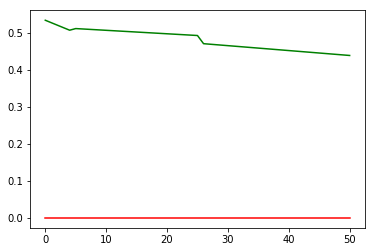

Working on... CSCO


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


1.637893706954064
Window: 0
[[188 254]
 [226 241]]
F1,score 0.501039501039501
Accuracy: 0.47194719471947194
84.83428982440716
Window: 4
[[234 197]
 [281 196]]
F1,score 0.45057471264367815
Accuracy: 0.473568281938326
51.7947467923121
Window: 5
[[185 237]
 [231 255]]
F1,score 0.5214723926380369
Accuracy: 0.4845814977973568
0.0001
Window: 25
[[157 278]
 [221 248]]
F1,score 0.49849246231155775
Accuracy: 0.4480088495575221
0.000774263682681127
Window: 26
[[150 282]
 [213 259]]
F1,score 0.5113524185587365
Accuracy: 0.4524336283185841
31.622776601683793
Window: 50
[[ 48 326]
 [109 416]]
F1,score 0.6566692975532754
Accuracy: 0.5161290322580645
[0, 0, 0, 0, 0, 0]
[0.47194719471947194, 0.473568281938326, 0.4845814977973568, 0.4480088495575221, 0.4524336283185841, 0.5161290322580645]
accuracy
accuracy


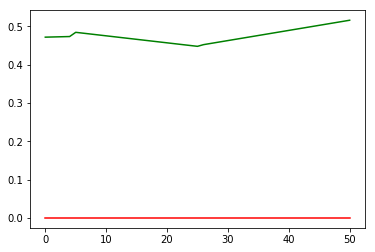

Working on... CMCSA
2.782559402207126
Window: 0
[[215 219]
 [224 251]]
F1,score 0.5312169312169313
Accuracy: 0.5126512651265126
4.39397056076079
Window: 4
[[206 234]
 [193 275]]
F1,score 0.5629477993858751
Accuracy: 0.5297356828193832
2.6826957952797255
Window: 5
[[226 207]
 [224 251]]
F1,score 0.5380493033226152
Accuracy: 0.525330396475771
21.54434690031882
Window: 25
[[212 263]
 [110 319]]
F1,score 0.6310583580613255
Accuracy: 0.5873893805309734
21.54434690031882
Window: 26
[[215 263]
 [116 310]]
F1,score 0.6206206206206206
Accuracy: 0.5807522123893806
2.6826957952797255
Window: 50
[[224 288]
 [ 82 305]]
F1,score 0.6224489795918368
Accuracy: 0.5884315906562848
[0, 0, 0, 0, 0, 0]
[0.5126512651265126, 0.5297356828193832, 0.525330396475771, 0.5873893805309734, 0.5807522123893806, 0.5884315906562848]
accuracy
accuracy


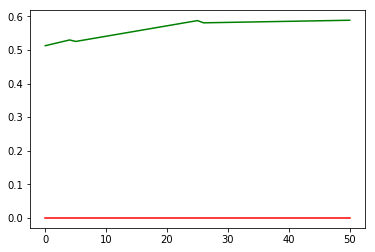

Working on... NVDA
1.0
Window: 0
[[287 172]
 [258 192]]
F1,score 0.4717444717444718
Accuracy: 0.5269526952695269
1.0
Window: 4
[[399  29]
 [431  49]]
F1,score 0.17562724014336917
Accuracy: 0.4933920704845815
1.0
Window: 5
[[315 121]
 [323 149]]
F1,score 0.40161725067385445
Accuracy: 0.5110132158590308
21.54434690031882
Window: 25
[[327  23]
 [524  30]]
F1,score 0.09884678747940692
Accuracy: 0.39491150442477874
11.787686347935873
Window: 26
[[345  14]
 [526  19]]
F1,score 0.06574394463667821
Accuracy: 0.4026548672566372
7.196856730011519
Window: 50
[[346   1]
 [547   5]]
F1,score 0.017921146953405017
Accuracy: 0.39043381535038935
[0, 0, 0, 0, 0, 0]
[0.5269526952695269, 0.4933920704845815, 0.5110132158590308, 0.39491150442477874, 0.4026548672566372, 0.39043381535038935]
accuracy
accuracy


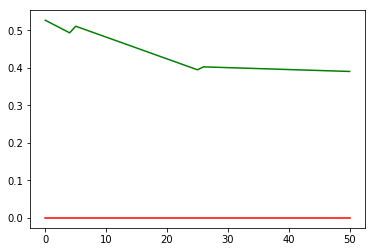

Working on... NFLX
1291.5496650148827
Window: 0
[[ 77 360]
 [ 87 385]]
F1,score 0.6327033689400164
Accuracy: 0.5082508250825083
1.637893706954064
Window: 4
[[314  80]
 [427  87]]
F1,score 0.2555066079295154
Accuracy: 0.44162995594713655
7.196856730011519
Window: 5
[[281 112]
 [395 120]]
F1,score 0.321285140562249
Accuracy: 0.44162995594713655
10000.0
Window: 25
[[  1 338]
 [  1 564]]
F1,score 0.7689161554192229
Accuracy: 0.625
1000.0
Window: 26
[[  8 333]
 [ 21 542]]
F1,score 0.7538247566063978
Accuracy: 0.6084070796460177
610.5402296585327
Window: 50
[[ 14 331]
 [ 51 503]]
F1,score 0.7247838616714698
Accuracy: 0.575083426028921
[0, 0, 0, 0, 0, 0]
[0.5082508250825083, 0.44162995594713655, 0.44162995594713655, 0.625, 0.6084070796460177, 0.575083426028921]
accuracy
accuracy


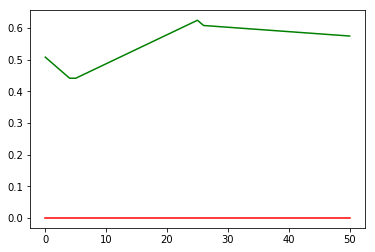

Working on... ADBE
1.0
Window: 0
[[218 201]
 [242 248]]
F1,score 0.5282215122470714
Accuracy: 0.5126512651265126
4.39397056076079
Window: 4
[[220 206]
 [247 235]]
F1,score 0.5092091007583965
Accuracy: 0.501101321585903
19.306977288832496
Window: 5
[[184 238]
 [215 271]]
F1,score 0.5447236180904523
Accuracy: 0.501101321585903
10000.0
Window: 25
[[108 291]
 [166 339]]
F1,score 0.5973568281938325
Accuracy: 0.4944690265486726
31.622776601683793
Window: 26
[[185 220]
 [240 259]]
F1,score 0.5296523517382412
Accuracy: 0.4911504424778761
2.6826957952797255
Window: 50
[[224 128]
 [332 215]]
F1,score 0.4831460674157303
Accuracy: 0.4883203559510567
[0, 0, 0, 0, 0, 0]
[0.5126512651265126, 0.501101321585903, 0.501101321585903, 0.4944690265486726, 0.4911504424778761, 0.4883203559510567]
accuracy
accuracy


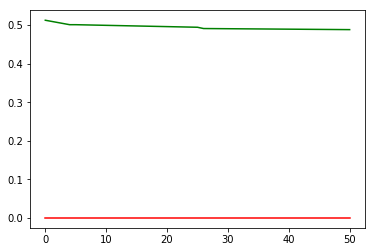

Working on... AMGN


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


0.000774263682681127
Window: 0
[[322 132]
 [304 151]]
F1,score 0.4092140921409214
Accuracy: 0.5203520352035204
0.046415888336127774
Window: 4
[[340  82]
 [416  70]]
F1,score 0.219435736677116
Accuracy: 0.45154185022026433
1.0
Window: 5
[[231 186]
 [305 186]]
F1,score 0.43105446118192353
Accuracy: 0.4592511013215859
227.58459260747887
Window: 25
[[370  58]
 [413  63]]
F1,score 0.21105527638190957
Accuracy: 0.47898230088495575
227.58459260747887
Window: 26
[[376  52]
 [403  72]]
F1,score 0.24040066777963276
Accuracy: 0.49612403100775193
1.637893706954064
Window: 50
[[392   0]
 [491  16]]
F1,score 0.061185468451242835
Accuracy: 0.45383759733036705
[0, 0, 0, 0, 0, 0]
[0.5203520352035204, 0.45154185022026433, 0.4592511013215859, 0.47898230088495575, 0.49612403100775193, 0.45383759733036705]
accuracy
accuracy


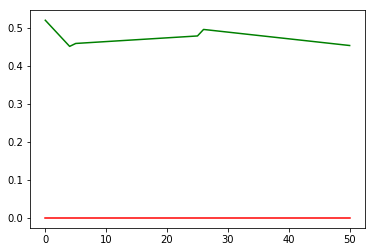

Working on... TXN
31.622776601683793
Window: 0
[[310 132]
 [342 119]]
F1,score 0.3342696629213483
Accuracy: 0.4750830564784053
19.306977288832496
Window: 4
[[186 241]
 [247 229]]
F1,score 0.4841437632135307
Accuracy: 0.45957918050941304
7.196856730011519
Window: 5
[[183 240]
 [206 273]]
F1,score 0.5504032258064516
Accuracy: 0.5055432372505543
1.0
Window: 25
[[ 89 337]
 [150 322]]
F1,score 0.5694076038903625
Accuracy: 0.4576837416481069
10000.0
Window: 26
[[ 92 330]
 [146 330]]
F1,score 0.5809859154929577
Accuracy: 0.46993318485523383
19.306977288832496
Window: 50
[[ 93 337]
 [136 327]]
F1,score 0.580301685891748
Accuracy: 0.47032474804031354
[0, 0, 0, 0, 0, 0]
[0.4750830564784053, 0.45957918050941304, 0.5055432372505543, 0.4576837416481069, 0.46993318485523383, 0.47032474804031354]
accuracy
accuracy


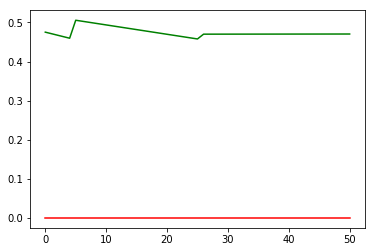

Working on... AVGO
51.7947467923121
Window: 0
[[158 287]
 [173 291]]
F1,score 0.5585412667946258
Accuracy: 0.49394939493949397
51.7947467923121
Window: 4
[[167 296]
 [163 282]]
F1,score 0.5513196480938416
Accuracy: 0.4944933920704846
21.54434690031882
Window: 5
[[163 295]
 [160 290]]
F1,score 0.5603864734299517
Accuracy: 0.4988986784140969
2.782559402207126
Window: 25
[[154 310]
 [166 274]]
F1,score 0.5351562500000001
Accuracy: 0.47345132743362833
4.39397056076079
Window: 26
[[148 320]
 [160 276]]
F1,score 0.5348837209302326
Accuracy: 0.4690265486725664
1.637893706954064
Window: 50
[[194 275]
 [ 87 343]]
F1,score 0.6545801526717556
Accuracy: 0.5973303670745272
[0, 0, 0, 0, 0, 0]
[0.49394939493949397, 0.4944933920704846, 0.4988986784140969, 0.47345132743362833, 0.4690265486725664, 0.5973303670745272]
accuracy
accuracy


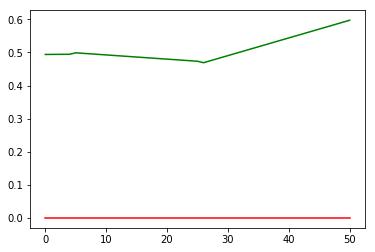

Working on... PYPL
1.0
Window: 0
[[262 174]
 [276 197]]
F1,score 0.466824644549763
Accuracy: 0.504950495049505
1.0
Window: 4
[[344  82]
 [357 125]]
F1,score 0.362844702467344
Accuracy: 0.5165198237885462
1291.5496650148827
Window: 5
[[222 182]
 [250 254]]
F1,score 0.5404255319148936
Accuracy: 0.5242290748898678
0.005994842503189409
Window: 25
[[254 141]
 [319 190]]
F1,score 0.4523809523809524
Accuracy: 0.4911504424778761
0.0001
Window: 26
[[248 136]
 [326 194]]
F1,score 0.45647058823529413
Accuracy: 0.4889380530973451
10000.0
Window: 50
[[239 133]
 [290 237]]
F1,score 0.528428093645485
Accuracy: 0.5294771968854283
[0, 0, 0, 0, 0, 0]
[0.504950495049505, 0.5165198237885462, 0.5242290748898678, 0.4911504424778761, 0.4889380530973451, 0.5294771968854283]
accuracy
accuracy


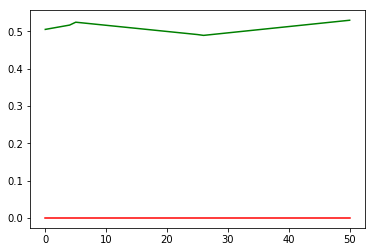

Working on... GILD


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


10000.0
Window: 0
[[297 161]
 [258 193]]
F1,score 0.4795031055900621
Accuracy: 0.5390539053905391
4.39397056076079
Window: 4
[[312 154]
 [286 156]]
F1,score 0.4148936170212766
Accuracy: 0.5154185022026432
610.5402296585327
Window: 5
[[232 244]
 [214 218]]
F1,score 0.4876957494407159
Accuracy: 0.4955947136563877
372.7593720314938
Window: 25
[[476  47]
 [336  45]]
F1,score 0.19027484143763215
Accuracy: 0.5763274336283186
0.000774263682681127
Window: 26
[[369 159]
 [252 124]]
F1,score 0.3763277693474962
Accuracy: 0.5453539823008849
0.005994842503189409
Window: 50
[[351 117]
 [323 108]]
F1,score 0.32926829268292684
Accuracy: 0.5105672969966629
[0, 0, 0, 0, 0, 0]
[0.5390539053905391, 0.5154185022026432, 0.4955947136563877, 0.5763274336283186, 0.5453539823008849, 0.5105672969966629]
accuracy
accuracy


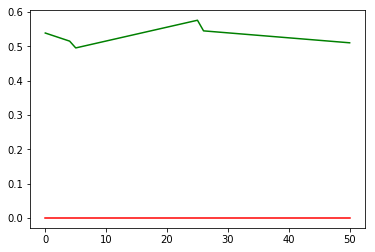

Working on... COST
2.6826957952797255
Window: 0
[[295 143]
 [328 143]]
F1,score 0.37780713342140027
Accuracy: 0.48184818481848185
10000.0
Window: 4
[[267 161]
 [281 199]]
F1,score 0.47380952380952385
Accuracy: 0.513215859030837
0.000774263682681127
Window: 5
[[198 232]
 [196 282]]
F1,score 0.5685483870967741
Accuracy: 0.5286343612334802
0.0001
Window: 25
[[106 343]
 [ 98 357]]
F1,score 0.618181818181818
Accuracy: 0.5121681415929203
0.005994842503189409
Window: 26
[[120 333]
 [104 347]]
F1,score 0.6136162687886825
Accuracy: 0.5165929203539823
0.005994842503189409
Window: 50
[[168 270]
 [232 229]]
F1,score 0.4770833333333334
Accuracy: 0.44160177975528364
[0, 0, 0, 0, 0, 0]
[0.48184818481848185, 0.513215859030837, 0.5286343612334802, 0.5121681415929203, 0.5165929203539823, 0.44160177975528364]
accuracy
accuracy


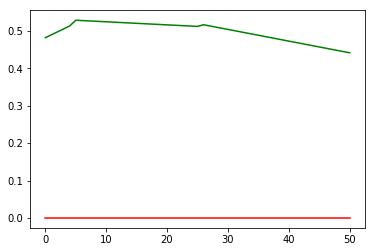

Working on... QCOM


/home/andrea/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


372.7593720314938
Window: 0
[[118 320]
 [143 328]]
F1,score 0.5862377122430743
Accuracy: 0.49064906490649063
51.7947467923121
Window: 4
[[130 327]
 [145 306]]
F1,score 0.5645756457564575
Accuracy: 0.4801762114537445
21.54434690031882
Window: 5
[[139 320]
 [144 305]]
F1,score 0.5679702048417132
Accuracy: 0.4889867841409692
166.81005372000558
Window: 25
[[201 335]
 [111 257]]
F1,score 0.5354166666666665
Accuracy: 0.5066371681415929
84.83428982440716
Window: 26
[[205 335]
 [107 257]]
F1,score 0.5376569037656904
Accuracy: 0.5110619469026548
4.39397056076079
Window: 50
[[386 174]
 [243  96]]
F1,score 0.31527093596059114
Accuracy: 0.5361512791991101
[0, 0, 0, 0, 0, 0]
[0.49064906490649063, 0.4801762114537445, 0.4889867841409692, 0.5066371681415929, 0.5110619469026548, 0.5361512791991101]
accuracy
accuracy


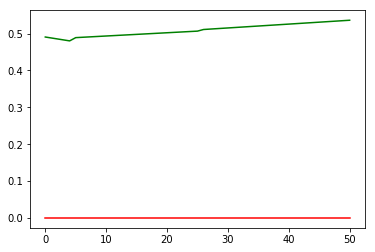

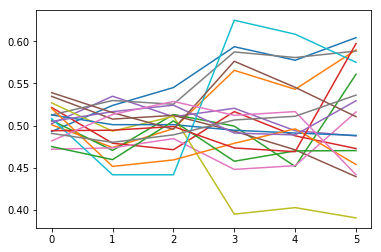

In [10]:
o=0
accstocksresults=[]
f1stocksresults=[]
f1scoreresults=[]
aucresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[0,4,5,25,26,50]
    f1total=[]
    acctotal=[]
    auctotal=[]
    f1scoretotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        dlist=[]
        for i in range(0,len(price)-t-1):
            dlist.append(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
        meanl=sum(dlist)/len(dlist)
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.concatenate(((np.logspace(0,3,15)),np.logspace(-4,4,10)))
        gspace=[1]
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                
                split=math.floor(len(x_tv)*0.8)
                x_train=x_tv[0:split]
                y_train=y_tv[0:split]
                x_val=x_tv[split:]
                y_val=y_tv[split:]
                rbf_svm=svm.SVC(C=c)
                x_train,y_train=smote(x_train,y_train)
                rbf_svm.fit(x_train,y_train)
                x_val,y_val=smote(x_val,y_val)
                cvacc=rbf_svm.score(x_val,y_val)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    
                    maxc=c
                    bestsvm=rbf_svm

        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(C=maxc)
        x_tv,y_tv=smote(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction)
        auc=metrics.auc(fpr, tpr)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1scoretotal.append(CM)
        f1total.append(totu)
        acctotal.append(valueacc)
        auctotal.append(auc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    f1scoreresults.append(f1scoretotal)
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
    aucresults.append(auctotal)
for p in accstocksresults:
    plt.plot(p)
plt.show()

In [15]:
tempacc=aucresults

[0.50541273 0.5009963  0.50315772 0.50482615 0.50385952 0.50888124]


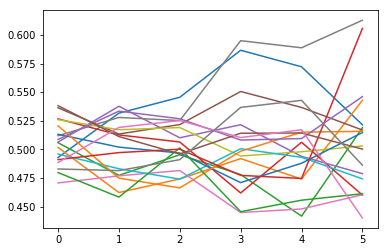

In [16]:
import operator
t=[0,0,0,0,0,0]
for i in range(0,len(tempacc)):
    #for k in range(0,len(tempacc[i])):
        #print(tempacc[i][k])
     #   if(tempacc[i][k]<0.5):
      #     tempacc[i][k]=1-tempacc[i][k]
    t=np.add(t,tempacc[i])
    plt.plot(tempacc[i])
print(t/len(tempacc))
plt.show()